# Segmentati of Smartphone Usage and Behavioral using Kmeans
dataset link: https://www.kaggle.com/datasets/bhadramohit/smartphone-usage-and-behavioral-dataset

## Import Libraries

In [72]:
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

## Load Dataset

In [73]:
df=pd.read_csv("mobile_usage_behavioral_analysis.csv")
df

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York
...,...,...,...,...,...,...,...,...,...,...
995,996,41,Female,3.58,12.46,13,4.12,2.44,1.33,Los Angeles
996,997,32,Male,9.65,10.51,11,1.02,1.02,3.84,Los Angeles
997,998,46,Female,11.68,10.06,9,2.35,3.13,1.03,Phoenix
998,999,25,Male,3.89,10.78,15,4.00,1.79,1.61,Phoenix


## Preprocessing

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Total_App_Usage_Hours         1000 non-null   float64
 4   Daily_Screen_Time_Hours       1000 non-null   float64
 5   Number_of_Apps_Used           1000 non-null   int64  
 6   Social_Media_Usage_Hours      1000 non-null   float64
 7   Productivity_App_Usage_Hours  1000 non-null   float64
 8   Gaming_App_Usage_Hours        1000 non-null   float64
 9   Location                      1000 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 78.3+ KB


In [75]:
df.describe()

,User_ID,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,38.745000,6.405670,7.696310,16.64700,2.456330,2.495270,2.475410
std,288.819436,12.186734,3.134855,3.714187,7.61961,1.439525,1.443392,1.450362
min,1.000000,18.000000,1.000000,1.010000,3.00000,0.000000,0.000000,0.010000
25%,250.750000,28.000000,3.590000,4.530000,10.00000,1.200000,1.282500,1.220000
50%,500.500000,40.000000,6.455000,7.880000,17.00000,2.445000,2.435000,2.455000
75%,750.250000,50.000000,9.122500,10.910000,23.00000,3.672500,3.710000,3.782500
max,1000.000000,59.000000,11.970000,14.000000,29.00000,4.990000,5.000000,5.000000


In [76]:
df["Location"].value_counts()

Location
New York       243
Phoenix        199
Chicago        192
Los Angeles    185
Houston        181
Name: count, dtype: int64

## Removing Unnecessary Columns

In [77]:
df=df.drop(columns=["User_ID"])
df

,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
1,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
2,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
3,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
4,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York
...,...,...,...,...,...,...,...,...,...
995,41,Female,3.58,12.46,13,4.12,2.44,1.33,Los Angeles
996,32,Male,9.65,10.51,11,1.02,1.02,3.84,Los Angeles
997,46,Female,11.68,10.06,9,2.35,3.13,1.03,Phoenix
998,25,Male,3.89,10.78,15,4.00,1.79,1.61,Phoenix


## Standardization

In [78]:
categoric=["Gender","Location"]
numericcol=[col for col in df.columns if col not in categoric]


scaler=StandardScaler()
numericaldata=df[numericcol]=scaler.fit_transform(df[numericcol])

In [79]:
df

,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1.416592,Male,-1.211402,-0.147161,0.965493,1.371742,-1.348381,-0.052020,Los Angeles
1,0.595617,Male,-1.364596,1.641473,0.177657,1.538547,1.334144,-0.031325,Chicago
2,-0.553748,Female,0.279046,-0.860998,-0.741485,1.475995,-0.544317,0.244606,Houston
3,-1.128430,Female,-1.661408,-0.378821,0.571575,0.502966,0.640985,1.451805,Phoenix
4,-0.061163,Male,-0.030533,1.318226,-0.347567,0.482115,-1.639508,1.051705,New York
...,...,...,...,...,...,...,...,...,...
995,0.185130,Female,-0.901823,1.283208,-0.478873,1.156286,-0.038311,-0.790136,Los Angeles
996,-0.553748,Male,1.035440,0.757931,-0.741485,-0.998280,-1.022597,0.941332,Los Angeles
997,0.595617,Female,1.683321,0.636713,-1.004097,-0.073902,0.439969,-0.997084,Phoenix
998,-1.128430,Male,-0.802885,0.830662,-0.216261,1.072883,-0.488864,-0.596984,Phoenix


## Categorical to Numerical (get_dummies)

In [80]:
df=pd.get_dummies(data=df,columns=["Location","Gender"],drop_first=True)
df.head()

,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location_Houston,Location_Los Angeles,Location_New York,Location_Phoenix,Gender_Male
0,1.416592,-1.211402,-0.147161,0.965493,1.371742,-1.348381,-0.052020,False,True,False,False,True
1,0.595617,-1.364596,1.641473,0.177657,1.538547,1.334144,-0.031325,False,False,False,False,True
2,-0.553748,0.279046,-0.860998,-0.741485,1.475995,-0.544317,0.244606,True,False,False,False,False
3,-1.128430,-1.661408,-0.378821,0.571575,0.502966,0.640985,1.451805,False,False,False,True,False
4,-0.061163,-0.030533,1.318226,-0.347567,0.482115,-1.639508,1.051705,False,False,True,False,True


## Select the best k by Elbow method

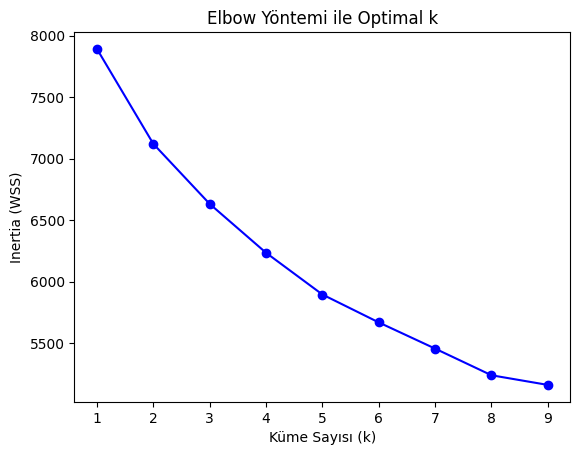

In [81]:
# K değerini belirlemek için önce Elbow methoduna bakalım
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Elbow grafiği çiz
plt.plot(K, inertia, 'bo-')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia (WSS)')
plt.title('Elbow Yöntemi ile Optimal k')
plt.show()


## Segmantaion by using Kmeans

In [82]:
# Örnek olarak k = 9 diyelim (grafikten sonra kesinleştireceğiz)
kmeans = KMeans(n_clusters=9, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)


print(df['Cluster'].value_counts())

cluster_profiles = df.groupby('Cluster').mean()
print(cluster_profiles)


Cluster
5    134
7    123
6    115
8    115
2    114
4    109
0    101
1     96
3     93
Name: count, dtype: int64
              Age  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
Cluster                                                             
0       -0.873196              -1.004521                -0.742074   
1        0.554569              -0.204007                 0.474781   
2        0.206734              -0.831385                 0.980660   
3        0.132164              -0.399001                -0.743865   
4        0.432176               0.327563                 0.509836   
5        0.178391              -0.009050                -0.366559   
6       -0.787904               0.921321                -0.206938   
7        0.968060               0.380967                -0.634353   
8       -0.872857               0.570641                 0.714129   

         Number_of_Apps_Used  Social_Media_Usage_Hours  \
Cluster                                                  
0        

## Recommendation based on every segmentation

In [83]:
for idx, row in cluster_profiles.iterrows():
    print(f"\n📦 Cluster {idx} Reklam Önerisi:")

    if row['Social_Media_Usage_Hours'] > row['Gaming_App_Usage_Hours'] and row['Social_Media_Usage_Hours'] > row['Productivity_App_Usage_Hours']:
        print("- Sosyal medya ağırlıklı kullanıcı, influencer kampanyaları öner.")
    elif row['Gaming_App_Usage_Hours'] > row['Productivity_App_Usage_Hours']:
        print("- Oyun sever kullanıcı, popüler oyunları veya e-spor içeriklerini hedefle.")
    else:
        print("- Verimlilik odaklı kullanıcı, not alma/zaman planlama uygulamaları öner.")



📦 Cluster 0 Reklam Önerisi:
- Oyun sever kullanıcı, popüler oyunları veya e-spor içeriklerini hedefle.

📦 Cluster 1 Reklam Önerisi:
- Verimlilik odaklı kullanıcı, not alma/zaman planlama uygulamaları öner.

📦 Cluster 2 Reklam Önerisi:
- Sosyal medya ağırlıklı kullanıcı, influencer kampanyaları öner.

📦 Cluster 3 Reklam Önerisi:
- Verimlilik odaklı kullanıcı, not alma/zaman planlama uygulamaları öner.

📦 Cluster 4 Reklam Önerisi:
- Oyun sever kullanıcı, popüler oyunları veya e-spor içeriklerini hedefle.

📦 Cluster 5 Reklam Önerisi:
- Oyun sever kullanıcı, popüler oyunları veya e-spor içeriklerini hedefle.

📦 Cluster 6 Reklam Önerisi:
- Sosyal medya ağırlıklı kullanıcı, influencer kampanyaları öner.

📦 Cluster 7 Reklam Önerisi:
- Sosyal medya ağırlıklı kullanıcı, influencer kampanyaları öner.

📦 Cluster 8 Reklam Önerisi:
- Sosyal medya ağırlıklı kullanıcı, influencer kampanyaları öner.


## Visualize

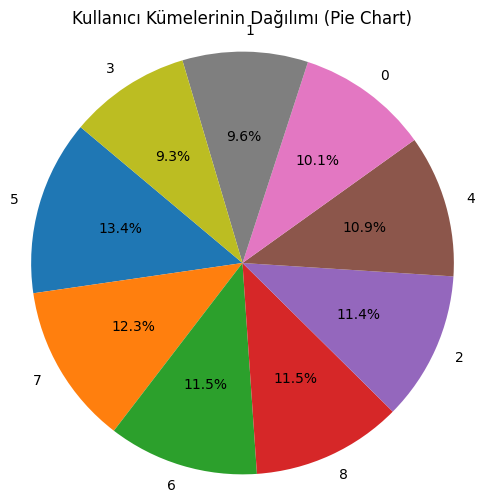

In [84]:
# Küme dağılımını hesapla
cluster_counts = df['Cluster'].value_counts()

# Pie chart çiz
plt.figure(figsize=(6, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Kullanıcı Kümelerinin Dağılımı (Pie Chart)")
plt.axis('equal')
plt.show()
